In [1]:
import numpy as np 
import pandas as pd 
import os
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import cv2
import glob

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
cd "/content/drive/MyDrive/Hackathon"

/content/drive/MyDrive/Hackathon


In [4]:
train=pd.read_csv("train.csv")

In [5]:
train

,file_id,label
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
...,...,...
1704,1704,1
1705,1705,1
1706,1706,1
1707,1707,1


In [6]:
path="/train/"

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1709 entries, 0 to 1708
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   file_id  1709 non-null   int64
 1   label    1709 non-null   int64
dtypes: int64(2)
memory usage: 26.8 KB


In [8]:
train["path"]=train["file_id"].apply(lambda x:"train/"+str(x).strip()+".jpg")

In [9]:
train.head()

,file_id,label,path
0,0,0,train/0.jpg
1,1,0,train/1.jpg
2,2,0,train/2.jpg
3,3,0,train/3.jpg
4,4,0,train/4.jpg


In [10]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(train, test_size=0.2, random_state=42)

In [11]:
train_df.reset_index(drop=True,inplace=True)
test_df.reset_index(drop=True,inplace=True)

In [12]:
test=pd.read_csv("test.csv")

In [13]:
test["path"]=test["file_id"].apply(lambda x:"test/"+str(x).strip()+".jpg")

In [14]:
test

,file_id,path
0,0,test/0.jpg
1,1,test/1.jpg
2,2,test/2.jpg
3,3,test/3.jpg
4,4,test/4.jpg
...,...,...
327,327,test/327.jpg
328,328,test/328.jpg
329,329,test/329.jpg
330,330,test/330.jpg


In [15]:
image_file="train/6.jpg"

In [16]:
image = tf.keras.preprocessing.image.load_img(image_file)

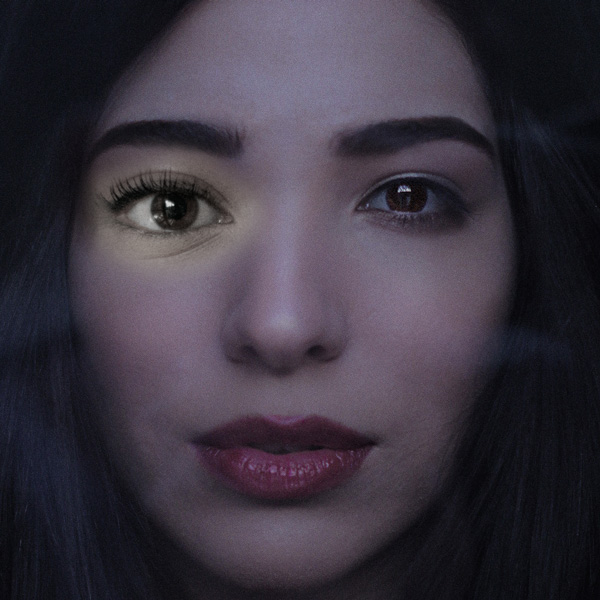

In [17]:
image

In [18]:
image=tf.keras.preprocessing.image.load_img("test/3.jpg")

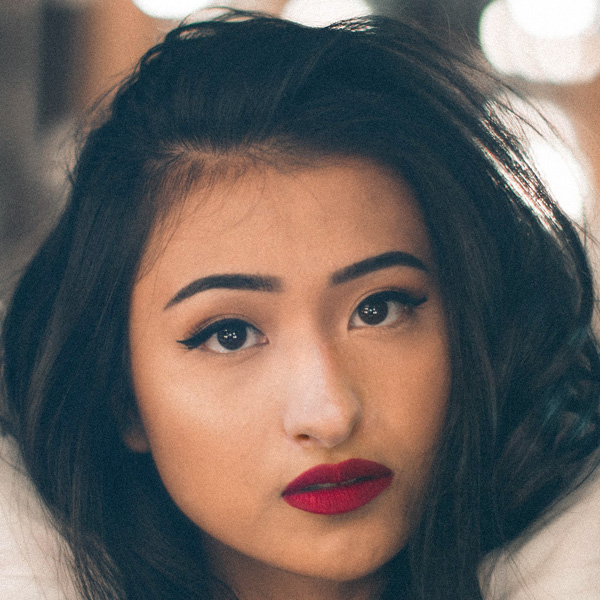

In [19]:
image

In [20]:
img_size=34

In [21]:
 image =  tf.keras.preprocessing.image.load_img(train_df["path"][0],
                                                                  target_size=(img_size, img_size))
            #Convert to array
image = tf.keras.preprocessing.image.img_to_array(image)
            

In [22]:
image

array([[[188., 190., 185.],
        [204., 206., 203.],
        [216., 220., 223.],
        ...,
        [ 32.,  32.,  30.],
        [ 18.,  18.,  20.],
        [ 16.,  17.,  19.]],

       [[197., 199., 194.],
        [213., 215., 212.],
        [219., 223., 226.],
        ...,
        [ 26.,  22.,  21.],
        [ 15.,  16.,  20.],
        [ 12.,  16.,  19.]],

       [[195., 197., 192.],
        [219., 223., 224.],
        [217., 221., 224.],
        ...,
        [ 24.,  23.,  21.],
        [ 15.,  16.,  20.],
        [ 10.,  15.,  18.]],

       ...,

       [[ 81.,  32.,  28.],
        [ 78.,  30.,  26.],
        [ 76.,  21.,  18.],
        ...,
        [ 95.,  37.,  26.],
        [103.,  43.,  33.],
        [ 85.,  27.,  16.]],

       [[ 69.,  28.,  22.],
        [ 82.,  29.,  23.],
        [ 86.,  31.,  26.],
        ...,
        [ 78.,  26.,  15.],
        [ 90.,  34.,  21.],
        [ 83.,  33.,  22.]],

       [[ 60.,  17.,  11.],
        [ 80.,  26.,  24.],
        [ 92.,  